# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

del train
del test

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import numpy as np

FIGURE_WIDTH = 15
FIGURE_HEIGHT = 8
    
def create_plot(num_x, max_y, title, xlabel):
    """
    Axiliaury function. Creates plot for drawing a histogram or bar.
    Size set to FIGURE_WIDTH, FIGURE_HEIGHT, axis have limits [0; num_x], [0; max_y],
    x ticks are moved 0.5 to the right, so they are in the middle of every bar,
    title and labels are set.
    
    :param num_x: number of classes for the histogram
    :param max_y: max y value of the plot
    :param title: plot title
    :param xlabel: x label
    :return: axis object
    """    
    f, ax = plt.subplots()
    f.set_size_inches(FIGURE_WIDTH, FIGURE_HEIGHT)
    ax.axis([0, num_x, 0, max_y])
    ax.set_xticks(np.arange(num_x + 1) + 0.5)
    ax.set_xticklabels(range(num_x))
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=15)
    return ax

def plot_examples(X_data, y_data):
    """
    Plots a grid of samples of each class from X_data.
    Grid has 10 columns and needed number of rows so all the classes can be shown.
    
    :param X_data: training or testing data of shape (num_samples, width, height, channels)
    :param y_data: corresponding labels of shape (num_samples)
    """
    classes = np.unique(y_data)
    n_classes = len(classes)
    n_cols = 10 # use 10 columns
    n_rows = int(np.ceil(float(n_classes) / n_cols)) # calc rows
    
    f, ax = plt.subplots(n_rows, n_cols)
    f.set_size_inches(FIGURE_WIDTH, FIGURE_HEIGHT)

    # plot samples
    class_idx = 0
    for i in range(n_rows):
        for j in range(n_cols):
            if class_idx < n_classes:
                data = X_data[y_data==classes[class_idx]]
                ax[i, j].imshow(data[0])
                ax[i, j].set_title(classes[class_idx])
                class_idx += 1
        
            ax[i, j].axis("off")    # turn off axes otherwise pictures will be hard to read

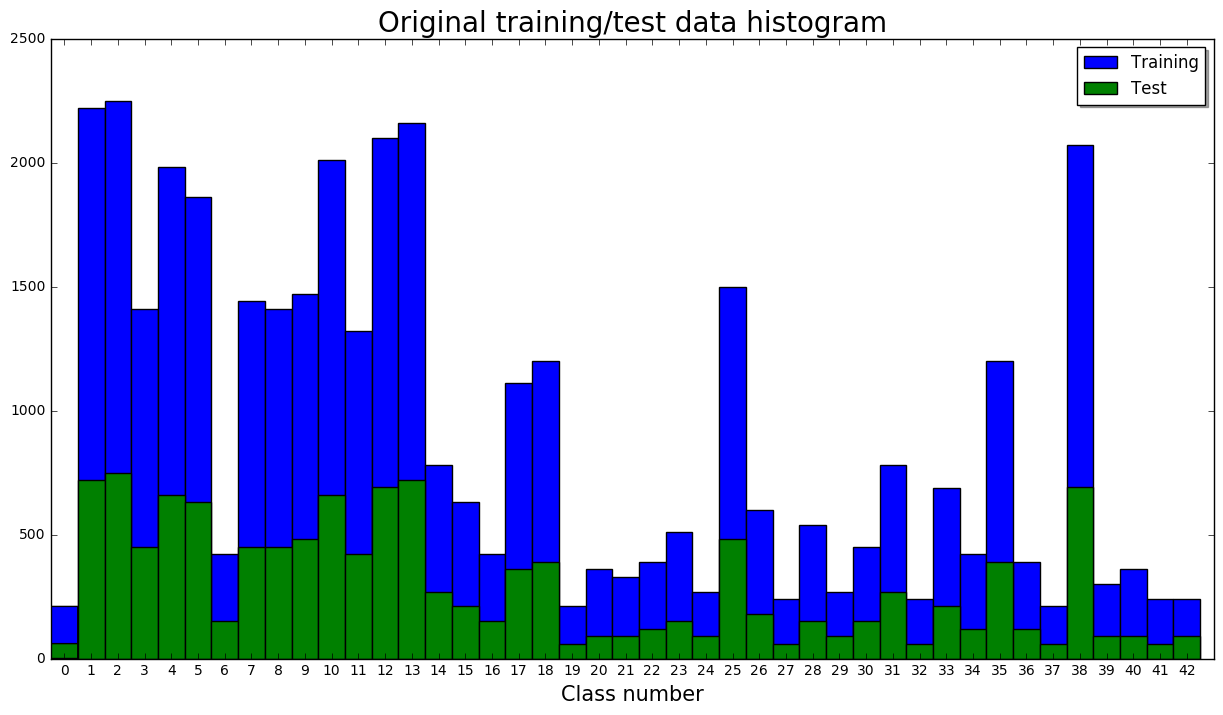

In [4]:
ax = create_plot(n_classes, 2500, "Original training/test data histogram", "Class number")
    
# plot histograms of training and testing data
ax.hist(y_train, bins=range(n_classes+1), label="Training")
ax.hist(y_test, bins=range(n_classes+1), label="Test")
_ = ax.legend(loc="upper right", shadow=True)

Examples of class images with corresponding class numbers:


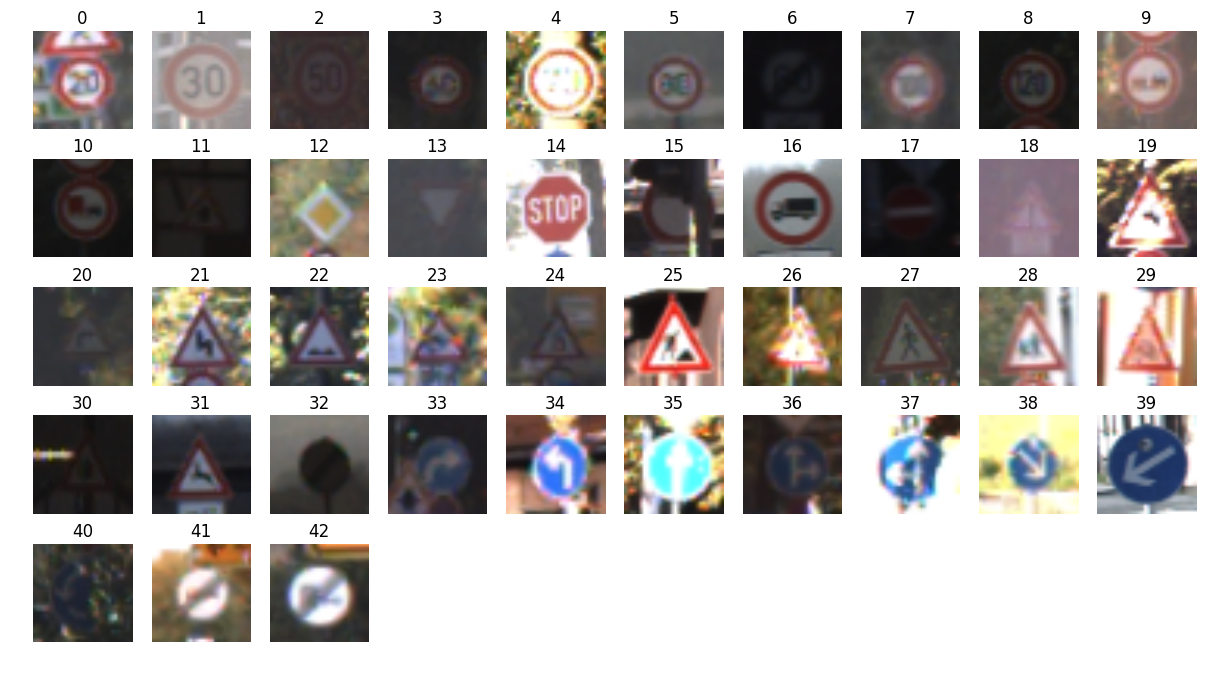

In [5]:
print("Examples of class images with corresponding class numbers:")

plot_examples(X_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
import cv2
import numpy as np

def normalize_set(images):
    """
    Normalizes given images by subtracting a fixed number and multiplying by a fixed number.
    Parameters of normalization are fixed so different images would be transformed the same way.
    The idea is that result will have mean values close to zero and standard deviation close to 1.
    
    :param images: images of shape (num_samples, height, width, channels)
    :return: normalized set of the same shape
    """
    images = images.astype("float32")

    mean = [124, 117, 104]
    std = 0.04

    for i in range(len(images)):
        images[i] = (images[i] - mean) * std

    return images


def normalize_sets(x_train, x_test):
    """
    Normalizes to sets of images
    
    :param x_train: images of shape (num_samples, height, width, channels)
    :param x_test: images of shape (num_samples, height, width, channels)
    :return: normalized sets of the same shape
    """
    print("Normalizing...")

    x_train = normalize_set(x_train)
    x_test = normalize_set(x_test)

    print("Normalization done.")

    return x_train, x_test

def resize_set(images, new_shape):
    """
    Resizes given set of images to given shape.
    NOTE!!! The resized images has uint8 type, so do not pass normalized images here,
    it will lead to huge loss of information. Only original images should be passed as arguments.
    
    :param images: set of images of shape (num_samples, height, width, channels)
    :param new_shape: tuple(new_height, new_width)
    :return: set of images of the shape (num_samples, new_shape[0], new_shape[1], channels)
    """
    n = len(images)
    res = np.zeros([n, new_shape[0], new_shape[1], images.shape[3]], dtype=np.uint8)
    for i in range(n):
        res[i] = cv2.resize(images[i], new_shape)
    return res


def resize_sets(x_train, x_test, new_shape):
    """
    Resizes two sets of images to given shape.
    NOTE!! The result of resizing has type uint8, so only real images should be processed here,
    normalized or any kind of float images will lose information!
    
    :param x_train: set of images of shape (num_samples, height, width, channels)
    :param x_test: set of images of shape (num_samples, height, width, channels)
    :param new_shape: tuple (new_height, new_width)
    :return: two sets of images of type uint8 and shape (num_samples, new_shape[0], new_shape[1], channels)
    """
    print("Resizing images to {}".format(new_shape))
    x_train = resize_set(x_train, new_shape)
    x_test = resize_set(x_test, new_shape)
    print("Resizing is done.")
    return x_train, x_test



In [5]:
X_train, X_test = resize_sets(X_train, X_test, (48, 48))
X_train, X_test = normalize_sets(X_train, X_test)


Resizing images to (48, 48)
Resizing is done.
Normalizing...
Normalization done.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 

1.As a base network architecture I use architecture from the paper "A Committee of Neural Networks for Traffic Sign Classification". That network consumes 48x48 images, so I resize images to 48x48.

2.As to normalization, in general it should be something like (image - mean(image))/std(image), so I fixed mean and std, so transformation is identical for all images. I took numbers from the paper "Systematic evaluation of CNN advances on the ImageNet" which are mean = [124, 117, 104], std = 0.04.

3.I decided not to use preprocessings that make images more readable for humans, e.g. (histogram equilization), because I think that in general network itself should learn to make those kind of preprocessings.

In [8]:
import scipy.ndimage as ndi


class ImageDataGenerator(object):
    """
    This is an image generator stolen from Keras.
    I tried to leave only needed code and throw away everything else.
    """
    def __init__(self, rotation_range=0.,width_shift_range=0.,height_shift_range=0.,
                 shear_range=0.,zoom_range=0.):
        self.rotation_range = rotation_range
        self.width_shift_range = width_shift_range
        self.height_shift_range = height_shift_range
        self.shear_range = shear_range
        self.row_index = 1
        self.col_index = 2
        self.channel_index = 3
        self.zoom_range = [1 - zoom_range, 1 + zoom_range]

    def transform_matrix_offset_center(self, matrix, x, y):
        o_x = float(x) / 2 + 0.5
        o_y = float(y) / 2 + 0.5
        offset_matrix = np.array([[1, 0, o_x],
                                  [0, 1, o_y],
                                  [0, 0, 1]])
        reset_matrix = np.array([[1, 0, -o_x],
                                 [0, 1, -o_y],
                                 [0, 0, 1]])
        transform_matrix = np.dot(np.dot(offset_matrix, matrix), reset_matrix)
        return transform_matrix

    def apply_transform(self, x, transform_matrix, channel_index):
        x = np.rollaxis(x, channel_index, 0)
        final_affine_matrix = transform_matrix[:2, :2]
        final_offset = transform_matrix[:2, 2]
        channel_images = [ndi.interpolation.affine_transform(x_channel, final_affine_matrix,
                                                             final_offset, order=3, mode="nearest", cval=0.) for
                          x_channel in x]
        x = np.stack(channel_images, axis=0)
        x = np.rollaxis(x, 0, channel_index + 1)
        return x

    def random_transform(self, x):
        # x is a single image, so it doesn't have image number at index 0
        img_row_index = self.row_index - 1
        img_col_index = self.col_index - 1
        img_channel_index = self.channel_index - 1

        # use composition of homographies to generate final transform that needs to be applied
        if self.rotation_range:
            dg = np.random.uniform(-self.rotation_range, self.rotation_range)
            theta = np.pi / 180 * dg
        else:
            theta = 0
        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                    [np.sin(theta), np.cos(theta), 0],
                                    [0, 0, 1]])
        if self.height_shift_range:
            tx = np.random.uniform(-self.height_shift_range, self.height_shift_range) * x.shape[img_row_index]
        else:
            tx = 0

        if self.width_shift_range:
            ty = np.random.uniform(-self.width_shift_range, self.width_shift_range) * x.shape[img_col_index]
        else:
            ty = 0

        translation_matrix = np.array([[1, 0, tx],
                                       [0, 1, ty],
                                       [0, 0, 1]])
        if self.shear_range:
            shear = np.random.uniform(-self.shear_range, self.shear_range)
        else:
            shear = 0
        shear_matrix = np.array([[1, -np.sin(shear), 0],
                                 [0, np.cos(shear), 0],
                                 [0, 0, 1]])

        if self.zoom_range[0] == 1 and self.zoom_range[1] == 1:
            zx, zy = 1, 1
        else:
            zx, zy = np.random.uniform(self.zoom_range[0], self.zoom_range[1], 2)
        zoom_matrix = np.array([[zx, 0, 0],
                                [0, zy, 0],
                                [0, 0, 1]])

        transform_matrix = np.dot(np.dot(np.dot(rotation_matrix, translation_matrix), shear_matrix), zoom_matrix)

        h, w = x.shape[img_row_index], x.shape[img_col_index]
        transform_matrix = self.transform_matrix_offset_center(transform_matrix, h, w)
        x = self.apply_transform(x, transform_matrix, img_channel_index)
        return x

    def generate_images(self, source_images, n):
        """
        Generates given number of images from given set of images.
        Samples images from source_images n times and for each samples images creates
        random transformation with predefined shift, shear, zoom and rotation params
        
        :param self: 
        :param source_images: set of images of shape (num_samples, height, width, channels)
        :param n: how many images should be generated
        :return: set of newly generated images of shape (n, height, width, channels) and
        also set of source indices (indices in source_images of images that were used
        for generating particular image) for debuggin
        """
        new_images = np.zeros([n] + list(source_images.shape[1:]), dtype=np.float32)
        new_indices = np.ones(n, dtype=np.int32) * -1

        for i in range(len(new_images)):
            source_idx = np.random.randint(0, len(source_images)) # sample index
            new_images[i] = self.random_transform(source_images[source_idx]) # create image
            new_indices[i] = source_idx # memorize source index

        return new_images, new_indices

In [9]:
from sklearn.utils import shuffle

# minimum number of images per class
SAMPLES_PER_CLASS = 3000

def augment(x, y, samples_per_class=SAMPLES_PER_CLASS):
    """
    If needed, generates additional images for each class, so each class contains equal number of
    images. Number of images per class is equal to maximum of samples_per_class value and maximum
    number of images per class of original data, i.e. if the lagest class in x contains more images than
    samples_per_class, than its number of images is used for all the other images, otherwise
    samples_per_class is used.
    
    :param x: set of images (num_samples, height, width, channels)
    :param y: set of corresponding labels (num_samples)
    :param samples_per_class: minimum number of images per class
    :return: set of images of the shape 
    (num_classes * max(samples_per_class, max_class_image_num(x)), height, width, channels) and 
    corresponding labels of shape (num_classes * max(samples_per_class, max_class_image_num(x))
    """
    print("Augmenting data...")

    datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,
                                 shear_range=0.05, zoom_range=0.05)

    hist, _ = np.histogram(y, bins=n_classes)

    max_num = np.max(hist)
    print("Max number of images of a single class: {}".format(max_num))
    
    max_num = max(np.max(hist), samples_per_class) # number of images per class
    print("Using {} samples per class".format(max_num))

    augmented_x = np.zeros([max_num * n_classes] + list(x.shape[1:]))
    augmented_y = np.zeros(max_num * n_classes)

    #generate images for each class
    for cl in range(n_classes):
        print("\rAugmenting class {}".format(cl), end="")
        num_required_images = max_num - hist[cl]
        cl_x = x[y == cl]
        new_images, source_indices = datagen.generate_images(cl_x, num_required_images)
        
        res = np.vstack((cl_x, new_images))
        augmented_x[cl*max_num:(cl+1)*max_num] = res
        augmented_y[cl*max_num:(cl+1)*max_num] = cl
        
    del x
    del y

    print("\rAugmentation is done.")
    
    return augmented_x, augmented_y


Augmenting data...
Max number of images of a single class: 2250
Using 3000 samples per class
Augmentation is done.


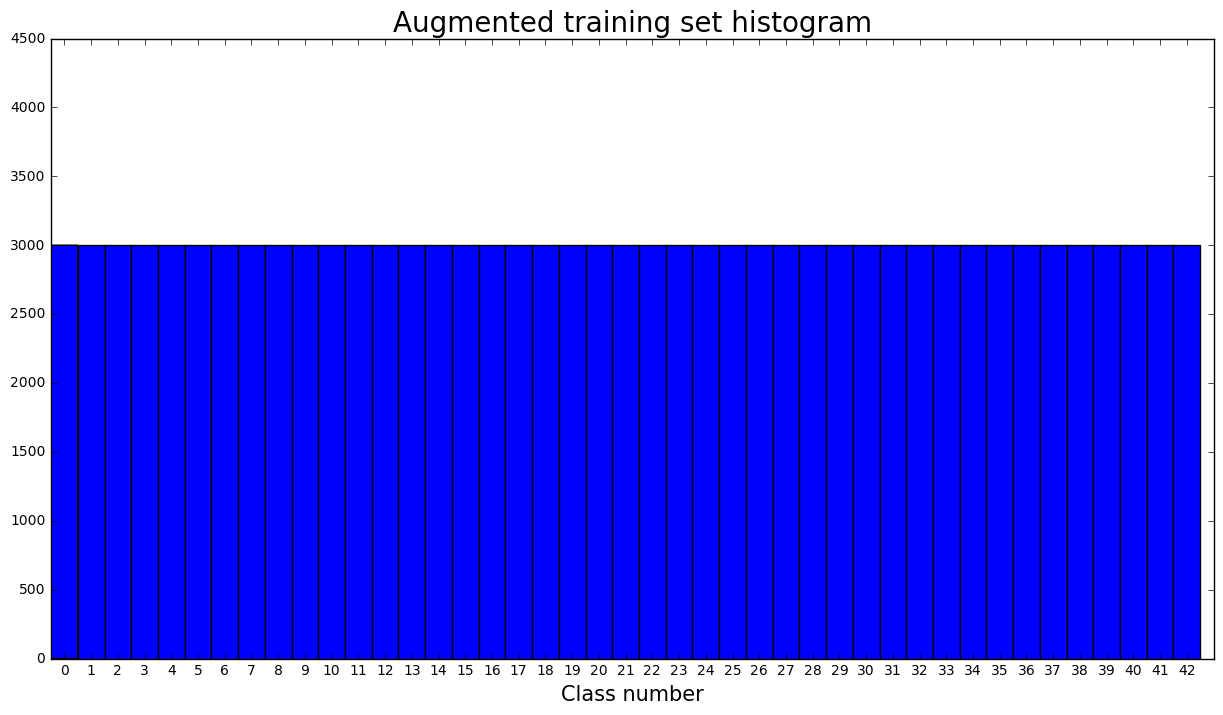

In [10]:
X_train, y_train = augment(X_train, y_train)
ax = create_plot(n_classes, 4500, "Augmented training set histogram", "Class number")
_ = ax.hist(y_train, bins=range(n_classes+1))

In [11]:
from sklearn.model_selection import train_test_split

VALIDATION_SIZE = 0.2

print("Splitting training data...")
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=VALIDATION_SIZE)
print("Splitting is done.")
print("Train set shape: {}, Validation set shape: {}".format(X_train.shape, X_valid.shape))


Splitting training data...
Splitting is done.
Train set shape: (103200, 48, 48, 3), Validation set shape: (25800, 48, 48, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

1.Train set split

Training data was randomly split into 80% of training data and 20% of validation data. Test data was not changed.


2.Data generation

2.1 Unbalanced data

Original data is not balanced, so a learning algorithm may prefer large classes over small ones. That is why data generation may be needed to balance training data. 
Some papers e.g. 
 -"Systematic evaluation of CNN advances on the ImageNet"
 -"Traffic Sign Recognition with Multi-Scale Convolutional Networks" 
show that data generation is needed, others e.g. 
 -"A Committee of Neural Networks for Traffic Sign Classification"
 -"Traffic Sign Classification Using Deep Inception Based Convolutional Networks" 
show that even better results can be achieved without additional image generation.

I used data generation to test if it helps learning.


2.2 Data generation implementation

I copy-pasted Keras code for image generation and removed everything I did not need. Images are created by randomly rotating original image in the range [-15, 15] degrees, randomly shifting vertically and horizontally in the range [-10, 10] percent of height and width respectively, randomly scaling in the range [95, 105] percent both horizontaly and vertically, randomly shering with shearing parameter in the range [-0.05, 0.05], so x'= x - sin(shearing_param), y'=y * cos(shearing_param). 
Points in possible gaps after transformation are filled with the nearest color.

2.3 Generated data size

In "Traffic Sign Recognition with Multi-Scale Convolutional Networks" they use 126K images, in "Systematic evaluation of CNN advances on the ImageNet" they discuss 200K+ sets. I tried different configurations of augmentation: 2250 images per class which gave 96750 images, 2800 images per class which gave 120400 images and 3000 images per class which gave 129000 images. The particular model described in this page uses 3000 images per class, the average model uses all 2250, 2800 and 3000 configurations.
After augmentation data is balanced.


In [6]:
import tensorflow as tf

def create_weights_variable(shape, name, mean=0, std=1):
    """
    Helper method to create weights of given shape and initialized from normal distribution with
    given mean and std
    
    :param shape: shape of weights matrix
    :param name: name to save
    :param mean: mean for normal initialization
    :param std: std for normal initialization
    :return: tensor of weights
    """
    return tf.Variable(tf.truncated_normal(shape, mean, std), name=name)


def create_biases_variable(shape, name):
    """
    Helper method to create biases of given shape with given name. Initialization is done with zeros.
    
    :param shape: shape of biases matrix matrix
    :param name: name to save
    :return: tensor of biases
    """
    return tf.Variable(tf.zeros(shape, name=name))


In [7]:
def create_model(x, y, keep_prob, reg_alpha, use_pre_layer, use_extra_fc_layer):
    """
    Creates logits and loss for given x, y, keep_prob and reg_alpha placeholders.
    use_pre_layer and use_extra_fc_layer are used to change architecture.
    
    In case use_pre_layer is true, a convolutional net with 1x1 kernel and 3->10->3 maps is prepended
    to the first layer. This is a technique described in "Systematic evaluation of CNN advances 
    on the ImageNet" and is supposed to help the network to transfrom input color space into
    something more convenient. The mininet architecture is the following
    
    1)Convolution, kernel 1x1, stride 1, maps from 1 to 10, output map size 48x48
    2)Convolution, kernel 1x1, stride 1, maps from 10 to 3, output map size 48x48
    
    In case use_extra_fc_layer is true a set of fully connected layers consists of 3 layers
    4000->1000->400->43, otherwise it consists of two layers 4000->200->43. This can be used to see
    if introductino of a new fully connected layer brings advantages.
    
    For case_use_extra_fc=True the fully connected part architecture is:
    
    1)Fully connected, 4x4*250 -> 1000
    2)Dropout, keep prob
    3)Fully connected, 1000 -> 400
    4)Dropout, keep prob
    5)Fully connected, 400 -> 43
    
    For case_use_extra_fc=False the fully connected part architecture is:

    1)Fully connected, 4x4*250 -> 200
    2)Dropout, keep probability
    3)Fully connected, 200 -> 43
    
    
    Middle part of the network is a convolutional part from 
    "A Committee of Neural Networks for Traffic Sign Classification" paper.
    
    1)Convolution, kernel 3x3, stride 1, maps from 3 to 100, output maps size 46x46
    2)Relu
    3)Maxpool, kernel 2x2, stride 2x2, output map size 23x23
    4)Convolution, kernel 4x4, stride 1, maps from 100 to 150, output map size 20x20
    5)Relu
    6)Maxpool, kernel 2x2, stride 2x2, output map size 10x10
    7)Convolution, kernel 3x3, stride 1, maps from 150 to 250, output map size 8x8
    8)Relu
    9)Maxpool, kernel 2x2, stride 2x2, output map size 4x4
    
    
    So the result network architecture:
    
    1)[Pre layer(optional)]
    2)Convolutinal part
    3)Fully connected layer part consisting of 2 or 3 layers
    
    :param x: placeholder for input images of shape (None, 48, 48, 3)
    :param y: placeholder for input labels of shape (None)
    :param keep_prob: placeholder for keep probability parameter for dropout
    :param reg_alpha: placeholder for regularization parameter of loss function
    :param use_pre_layer: if True an additional 1x1 convolutional net 3->10->3 is prepended
    :param use_extra_fc_layer: if True fc layers are 4000->1000->400->43, otherwise 4000->200->43
    :return: logits and loss
    """
    mean = 0
    std = 0.1

    weights_00 = create_weights_variable([1, 1, 3, 10], "weights_00", mean, std)
    biases_00 = create_biases_variable([10], "biases_00")

    weights_01 = create_weights_variable([1, 1, 10, 3], "weights_01", mean, std)
    biases_01 = create_biases_variable([3], "biases_01")

    weights_1 = create_weights_variable([3, 3, 3, 100], "weights_1", mean, std)
    biases_1 = create_biases_variable([100], "biases_1")

    weights_2 = create_weights_variable([4, 4, 100, 150], "weights_2", mean, std)
    biases_2 = create_biases_variable([150], "biases_2")

    weights_3 = create_weights_variable([3, 3, 150, 250], "weights_3", mean, std)
    biases_3 = create_biases_variable([250], "biases_3")

    # there is a difference in weights if we use 2 and 3 fully connected layers
    if not use_extra_fc_layer:        
        weights_4 = create_weights_variable([4*4*250, 200], "weights_4", mean, std)
        biases_4 = create_biases_variable([200], "biases_4")

        weights_5 = create_weights_variable([200, 43], "weights_5", mean, std)
        biases_5 = create_biases_variable([43], "biases_5")
    else:
        weights_4 = create_weights_variable([4*4*250, 1000], "weights_4", mean, std)
        biases_4 = create_biases_variable([1000], "biases_4")

        weights_5 = create_weights_variable([1000, 400], "weights_5", mean, std)
        biases_5 = create_biases_variable([400], "biases_5")        

        weights_6 = create_weights_variable([400, 43], "weights_6", mean, std)
        biases_6 = create_biases_variable([43], "biases_6")        


    layer_00 = tf.nn.conv2d(x, weights_00, [1, 1, 1, 1], padding="VALID")
    layer_00 = tf.nn.bias_add(layer_00, biases_00)
    layer_00 = tf.nn.relu(layer_00)

    layer_01 = tf.nn.conv2d(layer_00, weights_01, [1, 1, 1, 1], padding="VALID")
    layer_01 = tf.nn.bias_add(layer_01, biases_01)
    layer_01 = tf.nn.relu(layer_01)

    #here we prepend small convolutional network if use_pre_layer=True
    layer_1_input = layer_01 if use_pre_layer else x
    layer_1 = tf.nn.conv2d(layer_1_input, weights_1, [1, 1, 1, 1], padding="VALID")
    layer_1 = tf.nn.bias_add(layer_1, biases_1)
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.max_pool(layer_1, [1, 2, 2, 1], [1, 2, 2, 1], padding="VALID")

    layer_2 = tf.nn.conv2d(layer_1, weights_2, [1, 1, 1, 1], padding="VALID")
    layer_2 = tf.nn.bias_add(layer_2, biases_2)
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.max_pool(layer_2, [1, 2, 2, 1], [1, 2, 2, 1], padding="VALID")

    layer_3 = tf.nn.conv2d(layer_2, weights_3, [1, 1, 1, 1], padding="VALID")
    layer_3 = tf.nn.bias_add(layer_3, biases_3)
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.max_pool(layer_3, [1, 2, 2, 1], [1, 2, 2, 1], padding="VALID")

    flat_layer_3 = flatten(layer_3)

    layer_4 = tf.add(tf.matmul(flat_layer_3, weights_4), biases_4)
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)

    layer_5 = tf.add(tf.matmul(layer_4, weights_5), biases_5)
    
    #loss function and last layers are different for 2 and 3 fully connected layers architecture
    if not use_extra_fc_layer:
        loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(layer_5, y) +
                              reg_alpha * tf.nn.l2_loss(weights_00) +
                              reg_alpha * tf.nn.l2_loss(weights_01) +
                              reg_alpha * tf.nn.l2_loss(weights_1) +
                              reg_alpha * tf.nn.l2_loss(weights_2) +
                              reg_alpha * tf.nn.l2_loss(weights_3) +
                              reg_alpha * tf.nn.l2_loss(weights_4) +
                              reg_alpha * tf.nn.l2_loss(weights_5))
        return layer_5, loss
    else:
        layer_5 = tf.nn.relu(layer_5)
        layer_5 = tf.nn.dropout(layer_5, keep_prob)
        
        layer_6 = tf.add(tf.matmul(layer_5, weights_6), biases_6)

        loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(layer_6, y) +
                      reg_alpha * tf.nn.l2_loss(weights_00) +
                      reg_alpha * tf.nn.l2_loss(weights_01) +
                      reg_alpha * tf.nn.l2_loss(weights_1) +
                      reg_alpha * tf.nn.l2_loss(weights_2) +
                      reg_alpha * tf.nn.l2_loss(weights_3) +
                      reg_alpha * tf.nn.l2_loss(weights_4) +
                      reg_alpha * tf.nn.l2_loss(weights_5) +
                      reg_alpha * tf.nn.l2_loss(weights_6))

        return layer_6, loss


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I will present two architectures here. 

1. Single net architecture. 
    This one is a particular network which creation and training is shown in this page and can be reproduced by running all the cells.

2. Average of nets architecture.
    This one is an average of several models. Its training cannot be reproduced by running all the cell, because I did not create this kind of code from the very beginning, I just saved those models to files. As I don't have GPU at the moment, I need many hours on AWS if I want to retrain the model again and show the process of training here. It would be expensive so I won't do it. But I'd like to show the result anyway because it is my best result. So I will just load models from files and average them to demonstrate their performance. 

**Single net architecture**

This architecture is a modified architecture from the paper "A Committee of Neural Networks for Traffic Sign Classification".

The modifications are:

1. Relu is used as activation instead of hyperbolic tangent
2. Dropout is introduced between fully connected layers
3. L2 regularization is introduced to the loss function
4. Two additinal 1x1 convolutional layers are prepended to network to learn color space

Architecture:

0. Input 3 maps each 48x48
1. Convolution, kernel 1x1, stride 1, maps from 1 to 10, output map size 48x48
2. Convolution, kernel 1x1, stride 1, maps from 10 to 3, output map size 48x48
3. Convolution, kernel 3x3, stride 1, maps from 3 to 100, output maps size 46x46
4. Relu
5. Maxpool, kernel 2x2, stride 2x2, output map size 23x23
6. Convolution, kernel 4x4, stride 1, maps from 100 to 150, output map size 20x20
7. Relu
8. Maxpool, kernel 2x2, stride 2x2, output map size 10x10
9. Convolution, kernel 3x3, stride 1, maps from 150 to 250, output map size 8x8
10. Relu
11. Maxpool, kernel 2x2, stride 2x2, output map size 4x4
12. Fully connected, 4x4*250 -> 200
13. Dropout, keep probability 0.4
14. Fully connected, 200 -> 43


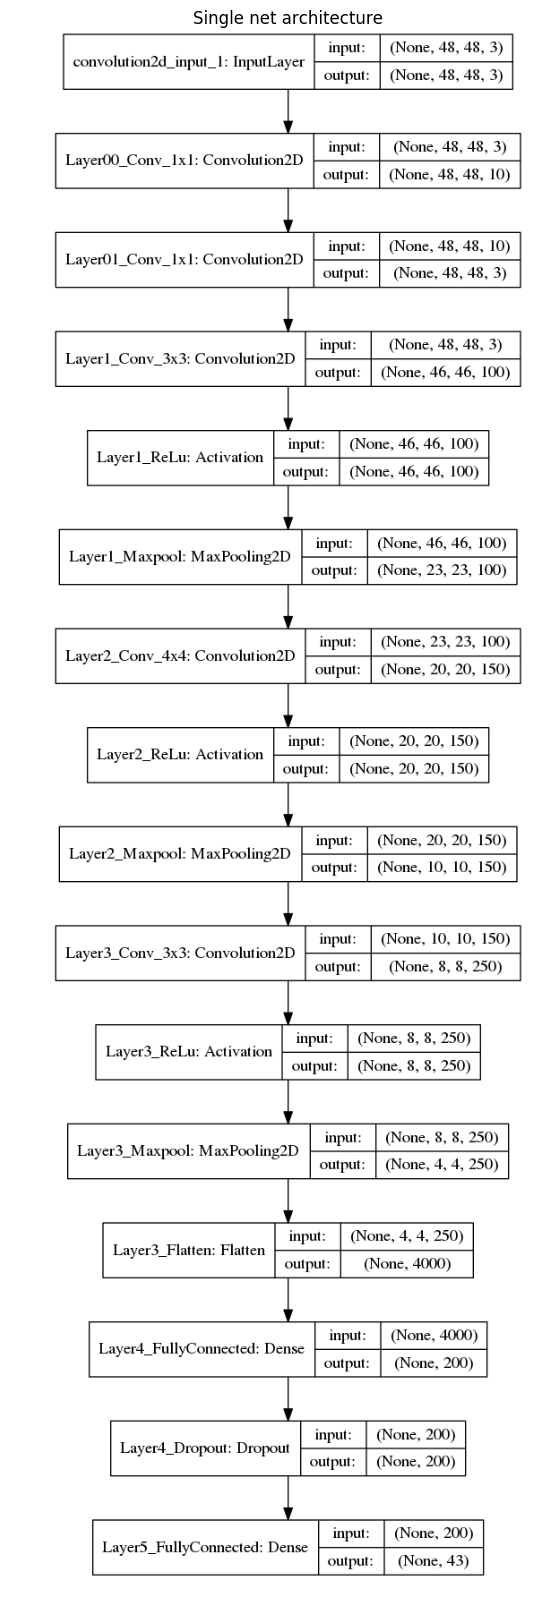

In [11]:
import matplotlib.image as mpimg
arch=mpimg.imread("images/model_0.png")
f, ax = plt.subplots()
f.set_size_inches(FIGURE_WIDTH, 20)
ax.axis("off")
ax.set_title("Single net architecture")
_ = ax.imshow(arch)


**Avergage of nets architecture**

It contais 5 networks. 4 single net architecture nets trained on different data plus a modified single net architecture with additional fully connected layer. Predictions of nets are averaged.

1. Single net architecture without data augmentation at all
2. Single net architecture using 2250 images per class instead of 3000
3. Single net architecture using 2800 images per class instead of 3000
4. Single net architecture with additinal fully connected layer
5. Single net architecture itself as described in training procedure


Architecture of the net with additinal fully connected layer:

1. Input 3 maps each 48x48
2. Convolution, kernel 1x1, stride 1, maps from 1 to 10, output map size 48x48
3. Convolution, kernel 1x1, stride 1, maps from 10 to 3, output map size 48x48
4. Convolution, kernel 3x3, stride 1, maps from 3 to 100, output maps size 46x46
5. Relu
6. Maxpool, kernel 2x2, stride 2x2, output map size 23x23
7. Convolution, kernel 4x4, stride 1, maps from 100 to 150, output map size 20x20
8. Relu
9. Maxpool, kernel 2x2, stride 2x2, output map size 10x10
10. Convolution, kernel 3x3, stride 1, maps from 150 to 250, output map size 8x8
11. Relu
12. Maxpool, kernel 2x2, stride 2x2, output map size 4x4
13. Fully connected, 4x4*250 -> 1000
14. Dropout, keep probability 0.4
15. Fully connected, 1000 -> 400
16. Dropout, keep probability 0.4
17. Fully connected, 400 -> 43

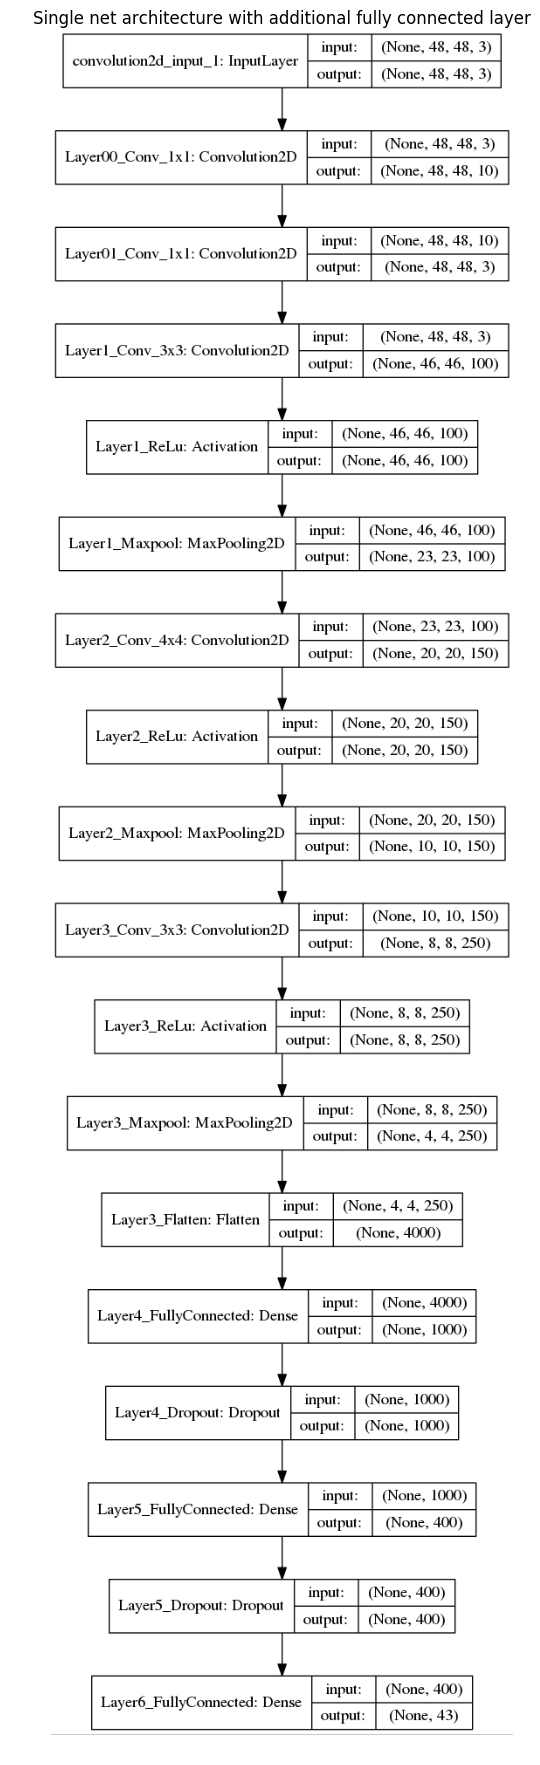

In [15]:
arch=mpimg.imread("images/model_2.png")
f, ax = plt.subplots()
f.set_size_inches(FIGURE_WIDTH, 22)
ax.axis("off")
ax.set_title("Single net architecture with additional fully connected layer")
_ = ax.imshow(arch)


In [8]:
def evaluate(x_data, y_data, session):
    """
    Calculates accuracy and loss in a batch manner.
    """
    num_samples = len(x_data)
    total_accuracy = 0
    total_loss = 0
    for offset in range(0, num_samples, BATCH_SIZE):
        x_batch, y_batch = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = session.run([accuracy_op, loss_op], feed_dict={x: x_batch, y: y_batch, keep_prob: 1, reg_alpha: 0})
        total_accuracy += accuracy * len(x_batch)
        total_loss += loss * len(x_batch)

    total_accuracy /= num_samples
    total_loss /= num_samples
    return total_accuracy, total_loss


In [9]:
def create_placeholders():
    """
    Creates all needed placeholders such as x, y, keep_prob and reg_alpha
    """
    x = tf.placeholder(tf.float32, [None, X_train.shape[1], X_train.shape[2], X_train.shape[3]])
    y = tf.placeholder(tf.int32, [None])
    keep_prob = tf.placeholder(tf.float32)
    reg_alpha = tf.placeholder(tf.float32)
    return x, y, keep_prob, reg_alpha


In [11]:
from tensorflow.contrib.layers import flatten
import time

#all constants except SAMPLES_PER_CLASSS are here
EPOCHS = 45
BATCH_SIZE = 128
KEEP_PROB = 0.4
REPORT_EPOCHS = 1
LEARNING_RATE = 0.001
REG_ALPHA = 0.001
MODEL_PATH = "model10"

#placeholders, variables and ops
x, y, keep_prob, reg_alpha = create_placeholders()
logits, loss_op = create_model(x, y, keep_prob, reg_alpha, use_pre_layer=True, use_extra_fc_layer=False)
correct_predictions = tf.equal(tf.cast(tf.argmax(logits, 1), tf.int32), y)
optimizer_op = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss_op)
accuracy_op = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
top_k = tf.nn.top_k(tf.nn.softmax(logits), k=5)
predictions = tf.argmax(logits, 1) 

def get_model_path(epoch):
    """
    Returns path to model by its epoch. Models are saved every epoch.
    """
    return MODEL_PATH + "/epoch" + str(epoch)


def train(X_train, y_train, X_valid, y_valid, X_test, y_test):    
    """
    Implements minibatch SGD. Returns last epoch number.
    
    :param X_train: train images (num_samples, 48, 48, 3)
    :param y_train: train labels (num_samples)
    :param X_valid: validation images (num_samples, 48, 48, 3)
    :param y_valid: validation labels (num_samples)
    :param X_test: test images (num_samples, 48, 48, 3)
    :param y_test: test labels (num_samples)
    :return: last epoch number
    """
    saver = tf.train.Saver()

    print("Training...")
    with tf.Session() as session:
        print("Initializing variables...")
        session.run(tf.global_variables_initializer())
        print("Variables initialized")

        start_time = time.time()
        num_samples = len(X_train)
        
        #iterate over epochs
        for epoch in range(EPOCHS):
            print("\rEpoch: {}".format(epoch), end="")
            train_accuracy = 0
            train_loss = 0
            
            # here we shuffle indices, because I had memory error while shuffling the whole augmented set
            train_indices = shuffle(np.arange(len(X_train)))
            
            #iterate over all samples in epoch
            for offset in range(0, num_samples, BATCH_SIZE):
                print("\rEpoch: {}, {}%".format(epoch, int(100 * offset/num_samples)), end="")
                
                #retrieve batch
                X_batch = X_train[train_indices[offset:offset+BATCH_SIZE]] 
                y_batch = y_train[train_indices[offset:offset+BATCH_SIZE]]
                
                #cals accuracy and loss
                _, a, l = session.run([optimizer_op, accuracy_op, loss_op], 
                                      feed_dict={x: X_batch, y: y_batch, 
                                                 keep_prob: KEEP_PROB, reg_alpha: REG_ALPHA})
                train_accuracy += a * len(X_batch)
                train_loss += l * len(X_batch)

            #every some epoch report loss/accuracy and save variables to model folder
            if epoch % REPORT_EPOCHS == 0:
                train_accuracy /= num_samples
                train_loss /= num_samples
                validation_accuracy, validation_loss = evaluate(X_valid, y_valid, session)
                print("\rEpoch: {}".format(epoch))
                print("Train accuracy: {:.6f}, Validation accuracy: {:.6f}".format(train_accuracy, validation_accuracy))
                print("Train loss: {:.6f}, Validation loss: {:.6f}".format(train_loss, validation_loss))
                print()

                saver.save(session, get_model_path(epoch))
                
        training_time = time.time() - start_time

        print("\nTraining is done. Training time: {:.2f} seconds".format(training_time))
        
        return epoch

In [17]:
# train single net model
last_epoch = train(X_train, y_train, X_valid, y_valid, X_test, y_test)

# save single net as last_model so it can be accessed later
last_model = get_model_path(last_epoch)

Training...
Initializing variables...
Variables initialized
Epoch: 0
Train accuracy: 0.466269, Validation accuracy: 0.872674
Train loss: 2.731294, Validation loss: 0.414091

Epoch: 1
Train accuracy: 0.868062, Validation accuracy: 0.970620
Train loss: 0.917514, Validation loss: 0.110293

Epoch: 2
Train accuracy: 0.944147, Validation accuracy: 0.983992
Train loss: 0.594982, Validation loss: 0.056166

Epoch: 3
Train accuracy: 0.965407, Validation accuracy: 0.987481
Train loss: 0.463987, Validation loss: 0.041624

Epoch: 4
Train accuracy: 0.973324, Validation accuracy: 0.991899
Train loss: 0.395475, Validation loss: 0.027858

Epoch: 5
Train accuracy: 0.978740, Validation accuracy: 0.991047
Train loss: 0.349095, Validation loss: 0.032043

Epoch: 6
Train accuracy: 0.980087, Validation accuracy: 0.992326
Train loss: 0.328342, Validation loss: 0.037717

Epoch: 7
Train accuracy: 0.983314, Validation accuracy: 0.995233
Train loss: 0.304048, Validation loss: 0.017388

Epoch: 8
Train accuracy: 0.9

In [12]:
# Here we evaluate single net model
with tf.Session() as session:
    print("Restoring session state with model {} ...".format(last_model))
    tf.train.Saver().restore(session, last_model)
    print("Evaluating test accuracy...")
    test_accuracy, test_loss = evaluate(X_test, y_test, session)
    print("Single net model test accuracy: {:.3f}".format(test_accuracy))


Restoring session state with model model10/epoch44 ...
Evaluating test accuracy...
Single net model test accuracy: 0.978


In [16]:
# The following set of methods is needed to evaluate average of several models

def evaluate_softmax(x_data, y_data, average_softmax, session):
    """
    Calculates softmax for given data and given session.
    Adds result softmax to average_softmax matrix
    
    :param x_data: set of images (num_samples, 48, 48, 3)
    :param y_data: set of labels (num_samples)
    :param average_softmax: softmax matrix (num_samples, n_classes)
    :param session: current session
    """
    num_samples = len(x_data)
    for offset in range(0, num_samples, BATCH_SIZE):
        x_batch, y_batch = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        s = session.run(softmax, feed_dict={x: x_batch, y: y_batch, keep_prob: 1, reg_alpha: 0})
        average_softmax[offset:offset+len(x_batch)] += s
        
def reset_evaluation_variables(use_pre_layer, use_extra_fc_layer):
    """
    Resets variables so they can be restored from other file.
    The better solution would be to have all ops as local variables, but I didn't have time
    to figure out how to do that, so I have to reset global variables so far.
    
    :param use_pre_layer: model creation parameter
    :param use_extra_fc_layer: model creation parameter
    """
    global x, y, keep_prob, reg_alpha, logits, softmax, loss_op, accuracy_op, correct_predictions, top_k, predictions
    
    tf.reset_default_graph()
    x, y, keep_prob, reg_alpha = create_placeholders()
    logits, loss_op = create_model(x, y, keep_prob, reg_alpha, use_pre_layer, use_extra_fc_layer)
    correct_predictions = tf.equal(tf.cast(tf.argmax(logits, 1), tf.int32), y)
    accuracy_op = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    softmax = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(tf.nn.softmax(logits), k=5)
    predictions = tf.argmax(logits, 1) 

def evaluate_average_model(X_data, y_data):
    """
    Calculates accuracy, softmax and prediction of combined several models.
    It iterates over models, calculates softmax sums softmaxed of all models and normalizes it.
    Then predictions and accuracy are calculated based on this average softmax.
    
    :param X_data: set of images (num_samples, 48, 48, 3)
    :param y_data: set of labels (num_samples)
    :return: 
    """
    print("Evaluating avarage model...")
    
    # all models' softmaxes will be added to this matrix
    average_softmax = np.zeros([len(X_data), n_classes], dtype=np.float32)

    # models params
    models = []
    models.append({"path": "trained_models/model6/epoch39", "use_pre_layer": True, "use_extra_fc_layer": False})
    models.append({"path": "trained_models/model7/epoch39", "use_pre_layer": True, "use_extra_fc_layer": False})
    models.append({"path": "trained_models/model8/epoch39", "use_pre_layer": True, "use_extra_fc_layer": False})
    models.append({"path": "trained_models/model9/epoch39", "use_pre_layer": True, "use_extra_fc_layer": True})
    models.append({"path": "trained_models/model10/epoch44", "use_pre_layer": True, "use_extra_fc_layer": False})
        
    # iterate over all models
    for model in models:
        reset_evaluation_variables(model["use_pre_layer"], model["use_extra_fc_layer"])

        print("Evaluating model: {}".format(model["path"]))
        with tf.Session() as session:
            tf.train.Saver().restore(session, model["path"])
            evaluate_softmax(X_data, y_data, average_softmax, session)

    # normalize softmax
    average_softmax = average_softmax / np.sum(average_softmax, axis=1, keepdims=True)
    
    predictions = np.argmax(average_softmax, 1)
    accuracy = np.sum(predictions == y_data)/float(len(y_data))
    
    print("Average of nets test accuracy: {}".format(np.round(accuracy, 3)))
    
    return average_softmax, predictions


In [14]:
# Here we evaluate performance of average model

_ = evaluate_average_model(X_test, y_test)

Evaluating avarage model...
Evaluating model: model6/epoch39
Evaluating model: model7/epoch39
Evaluating model: model8/epoch39
Evaluating model: model9/epoch39
Evaluating model: model10/epoch44
Average of nets test accuracy: 0.988


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer**

The same for all models:

    1. Batch size - 128
    2. Optimizer - Adam optimizer
    3. Learning rate - 0.001
    4. Regularization penalty - 0.001
    5. Keep probability for dropout - 0.4
    
Differencies:

    1. Single net model
    
        1. Number of epochs - 45
        2. Data augmentation - 3000 images per class

    2. Average of models (ordering as in the answer for question 3)

        1. Model 1
            1. Number of epochs - 40
            2. Data augmentation - no agumentation
        2. Model 2
            1. Number of epochs - 40
            2. Data augmentation - 2250 images per class
        3. Model 3
            1. Nubmer of epochs - 40
            2. Data augmentation - 3000 images per class
        4. Model 4 (with additional fully connected layer)
            1. Number of epochs - 40
            2. Data augmentation - 3000 images per class
        5. Model 5
            1. Number of epochs - 45
            3. Data augmentation - 3000 images per class


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

<ol>
<li>I looked through several papers describing solutions. Those are "A Committee of Neural Networks for Traffic Sign Classification", "Man vs. Computer: Benchmarking Machine Learning Algorithms for Traffic Sign Recognition", "Traffic Sign Recognition with Multi-Scale Convolutional Networks", "Traffic Sign Classification Using Deep Inception Based Convolutional Networks". Also I used "Systematic evaluation of CNN advances on the ImageNet"</li>
<br>

<li>I decided to use an architecture from "A Committee of Neural Networks for Traffic Sign Classification" as a base architecture, because it was relatively simple and promised good results. But instead of committee I was going to used just one network because I was using AWS and was limited in computational time.</li>
<br>

<li>Without experimenting I made the following changes to the architecture:</li>
    <br>
    <ol>
        <li>I used relu as activation instead of hyperbolic tangent, because it may speed up learning</li>
        <li>I intorduced dropout and L2 regularization, because I thought it may help with overfitting</li>
   </ol>
   <br>
<li>Without experimenting I decided that I would use normalization and would not use any other preprocessing, I thought that neural net should learn preprocessing itself.</li>
<br>

<li>As new data for testing I found Belgium traffic signs data set http://www.vision.ee.ethz.ch/~timofter/BelgiumTSC/BelgiumTSC_Training.zip I had to manually look at it and choose classes that match German dataset, also I had to manually split some data e.g. all the speed limit signs were in the same category. But eventually I was able to create a dataset that has 26 classes each of which is represented in German dataset as well. I reassigned class numbers so the new dataset has the same class numbers as German dataset.</li><br>

<li>I had to do experiments with different parameters, but I was limited with computational time as I was working on AWS, so I did not search though all parameters but through some I thought could help. First I limited number of epochs per training to 40, so each training would not take more than couple hours. Next I tried different keep probabilities for dropout layer: 0.5, 0.4, 0.3. The results for test set and new belgium test set were the following:</li>
   <br>
   <ol>
   <li>keep_prob: 0.5, test_accuracy: 0.969, new_data_test_accuracy: 0.894</li>
   <li>keep_prob: 0.4, test_accuracy: 0.976, new_data_test_accuracy: 0.892</li>
   <li>keep_prob: 0.3, test_accuracy: 0.974, new_data_test_accuracy: 0.875</li>
   </ol>
<br>
<li>As results were almost equal around 0.975, I decided I needed somthing to improve accuracy, so I used an idea of additional convolutional layer from "Systematic evaluation of CNN advances on the ImageNet". This layer consists of two 1x1 convolutional layers that map 3 channels of input image to 10 map then again to 3 maps. The results were almost the same, but I noticed that good validation accuracy was achieved much faster that without this prepended layer.</li><br>
    <ol>
   <li>keep_prob: 0.5, test_accuracy: 0.971, new_data_test_accuracy: 0.863</li>
   <li>keep_prob: 0.4, test_accuracy: 0.976, new_data_test_accuracy: 0.890</li>
   </ol>
<br>
<li>I wanted better results so I decided to try data augmentation. It gave the same results on test set, but better results on new data set. But this may be due to larger number of steps, because I used fixed number of epochs which means that for larger augmentation the same number of epochs leads to greater number of steps. So it is not clear if it really helped.</li><br>
    <ol>
   <li>epochs: 40, images per class: 2250, test_accuracy: 0.972, new_data_test_accuracy: 0.924</li>
   <li>epochs: 40, images per class: 2800, test_accuracy: 0.979, new_data_test_accuracy: 0.934</li>
   <li>epochs: 45, images per class: 3000, test_accuracy: 0.974, new_data_test_accuracy: 0.895</li>
   </ol>
<br>
<li>Results were not good so I tried to add additional fully connected layer, so the model would have 3 fully connected layers instead of two. The result was the same.</li><br>
<ol>
   <li>num_epochs: 40, images per class: 3000, test_accuracy: 0.974, new_data_test_accuracy: 0.895</li>
   </ol>
<br>
<li>I didn't like the results, but I didn't have time for more research. I noticed that I saved 5 last models so I decided to average them. And the results was my best result. It is an average human level for this benchmark.</li><br>
<ol>
   <li>fc_layers: 2, epochs: 40, images per class: as is, test_accuracy: 0.972, new_data_test_accuracy: 0.924</li>
   <li>fc_layers: 2, epochs: 40, images per class: 2250, test_accuracy: 0.972, new_data_test_accuracy: 0.924</li>
   <li>fc_layers: 2, epochs: 40, images per class: 2800, test_accuracy: 0.979, new_data_test_accuracy: 0.934</li>
   <li>fc_layers: 2, epochs: 45, images per class: 3000, test_accuracy: 0.974, new_data_test_accuracy: 0.895</li>
   <li>fc_layers: 3, epochs: 40, images per class: 3000, test_accuracy: 0.974, new_data_test_accuracy: 0.895</li>
    <br>
    <dd>average test accuracy: 0.988, average test accuracy on new data: 0.936</dd>
</ol><br>
<li>Conclusion. I was able to achieve average human level accuracy, but turned out it was not that simple. I think it would be better to take an article with good results and try to implement it as close as possible to the original idea and then start modifying it. But I'm afraid it may require a lot of computational time.</li>
</ol>

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
print("Loading Belgium traffic signs...")

with open("data/belgium.p", "rb") as f:
    belgium = pickle.load(f)
    
X_belgium = belgium["features"]
y_belgium = belgium["labels"]

print("Loading is done.")
print("Images shape: {}, Labels shape: {}".format(X_belgium.shape, y_belgium.shape))
print("Number of classes: {}".format(len(np.unique(y_belgium))))

Loading Belgium traffic signs...
Loading is done.
Images shape: (2061, 48, 48, 3), Labels shape: (2061,)
Number of classes: 26


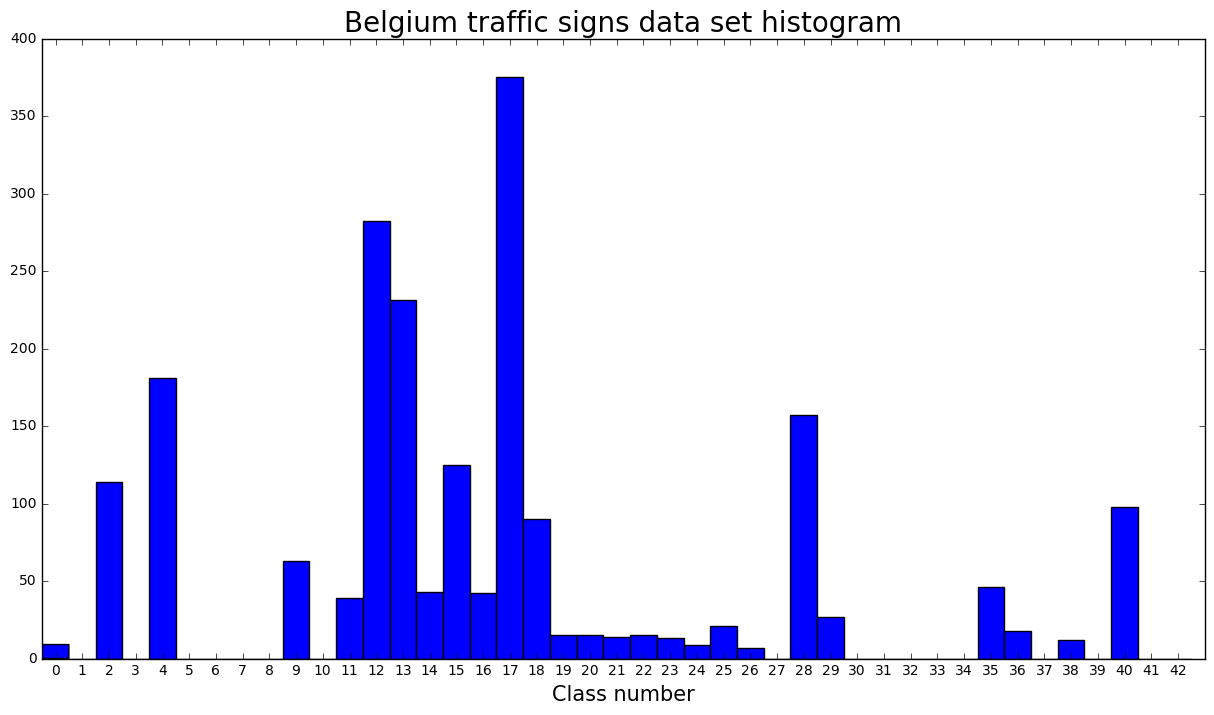

In [35]:
ax = create_plot(n_classes, 400, "Belgium traffic signs data set histogram", "Class number")
_ = ax.hist(y_belgium, bins=range(n_classes+1))

Examples of class images with corresponding class numbers:


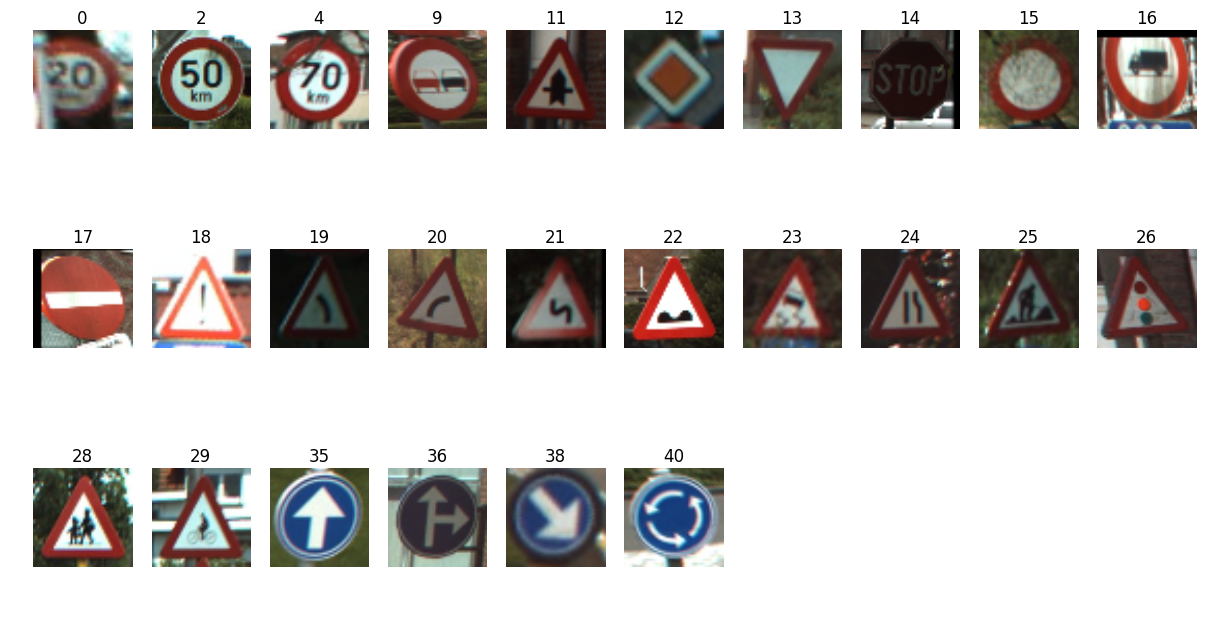

In [36]:
print("Examples of class images with corresponding class numbers:")

plot_examples(X_belgium, y_belgium)

In [13]:
print("Normalizing...")
X_belgium = normalize_set(X_belgium)
print("Normalization is done.")

Normalizing...
Normalization is done.


In [17]:
def plot_incorrect_predictions(preds, classes):
    """
    Plots percentage of incorrect predictions by class for belgium data.
    
    :param preds: predictions
    :param classes: list of classes e.g. [0, 1, ... 43]
    """
    
    x_bar = classes
    x_bar_str = ["x" for i in classes]
    y_bar = np.zeros_like(classes, dtype=np.float)
    
    for cl in classes:
        num_correct = len(y_belgium[y_belgium == cl])
        num_incorrect = np.sum(preds[y_belgium == cl] != y_belgium[y_belgium == cl])
        if num_correct > 0:
            y_bar[cl] = float(num_incorrect)/num_correct
            x_bar_str[cl] = str(x_bar[cl])

    ax = create_plot(len(classes), 1, "Percentage of incorrect predictions by class", "Class number\n(x - not present in dataset)")
    ax.xaxis.set_ticklabels(x_bar_str)
    ax.bar(x_bar, y_bar)    
    
def plot_incorrect_examples(x_data, y_data, preds):
    """
    Plots one samples of each incorrectly predicted class.    
    
    :param x_data: set of images (num_samples, 48, 48, 3)
    :param y_data: set of labels (num_samples)
    :param preds: predictions (num_samples)
    """
    print("Examples of incorrect classification")
    
    inc_indices = y_data != preds
    inc_x = x_data[inc_indices]
    inc_y = y_data[inc_indices]
    inc_preds = preds[inc_indices]

    plot_examples(inc_x, inc_y)


**New data on single net model**

Restoring session state with model model10/epoch44 ...
Restoring is done.
Evaluating test accuracy...
Single net model test accuracy: 0.907
Examples of incorrect classification


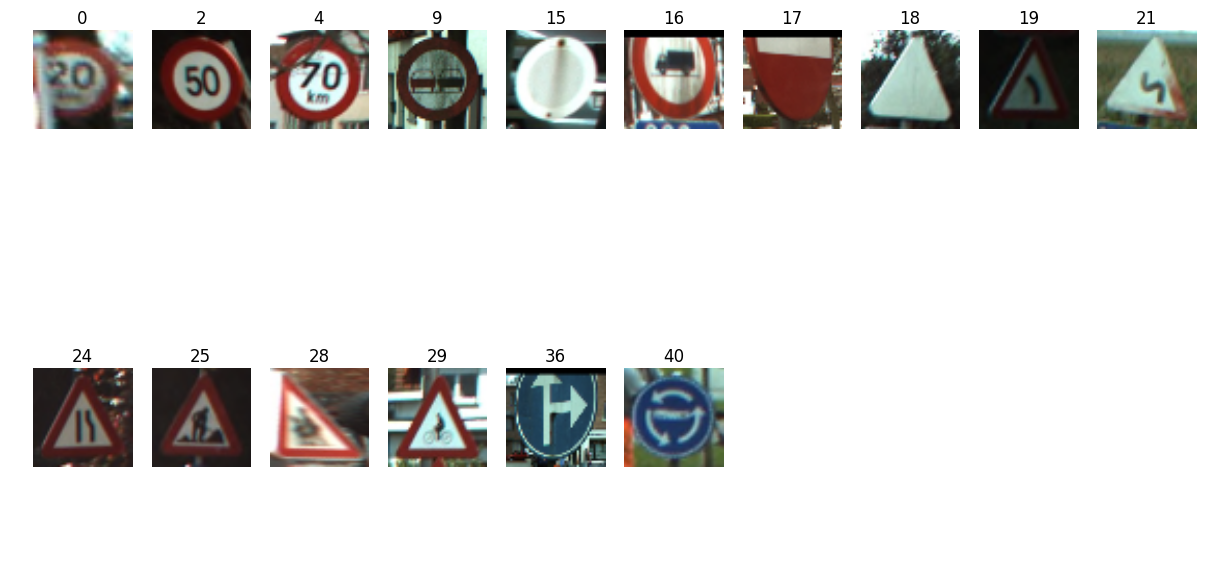

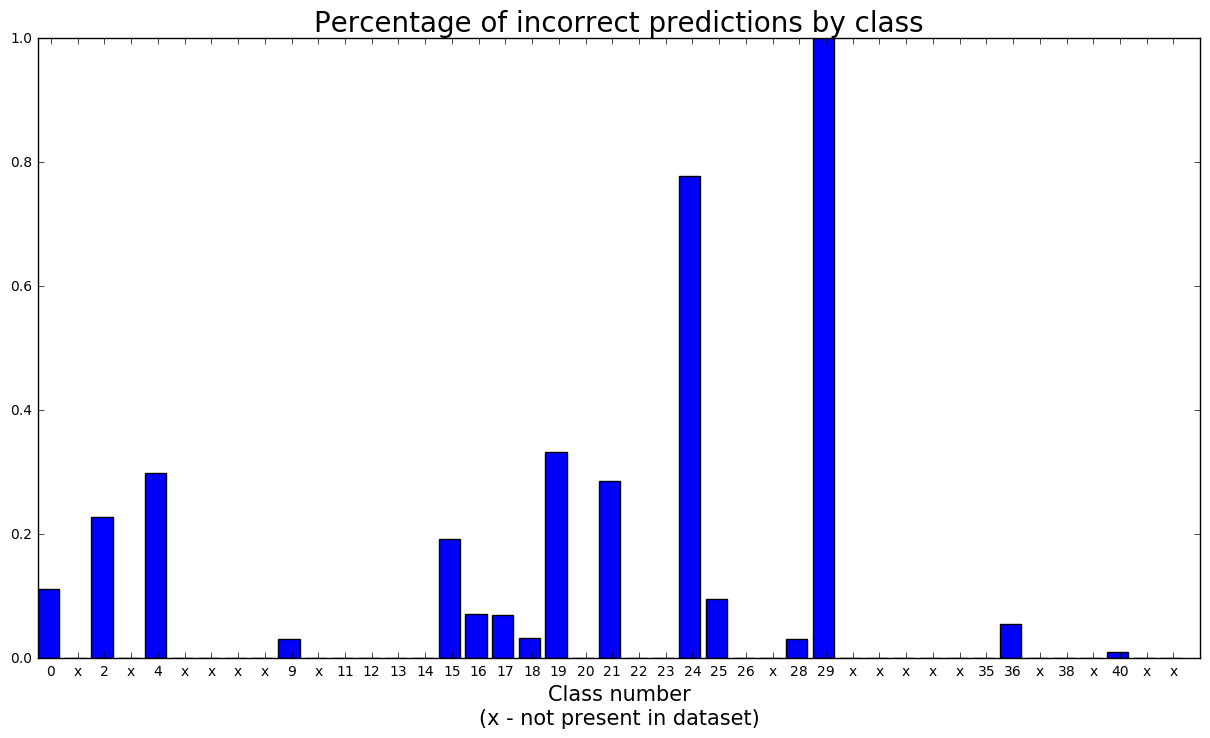

In [26]:
# Here we evaluate performance of single net model with new data

reset_evaluation_variables(True, False)

with tf.Session() as session:    
    print("Restoring session state with model {} ...".format(last_model))
    tf.train.Saver().restore(session, last_model)
    print("Restoring is done.")
    
    print("Evaluating test accuracy...")
    test_accuracy, test_loss = evaluate(X_belgium, y_belgium, session)
    print("Single net model test accuracy: {:.3f}".format(test_accuracy))
    
    preds = np.zeros(len(X_belgium))
    for offset in range(0, len(X_belgium), BATCH_SIZE):
        x_batch = X_belgium[offset:offset+BATCH_SIZE]
        y_batch = y_belgium[offset:offset+BATCH_SIZE]
        p = session.run(predictions, feed_dict={x: x_batch, y: y_batch, keep_prob:1})
        preds[offset:offset+BATCH_SIZE] = p
        
    plot_incorrect_examples(belgium["features"], y_belgium, preds)
    
    classes = np.arange(n_classes)
    
    plot_incorrect_predictions(preds, classes)



**New data on average of nets model**

Evaluating avarage model...
Evaluating model: model6/epoch39
Evaluating model: model7/epoch39
Evaluating model: model8/epoch39
Evaluating model: model9/epoch39
Evaluating model: model10/epoch44
Average of nets test accuracy: 0.936
Examples of incorrect classification


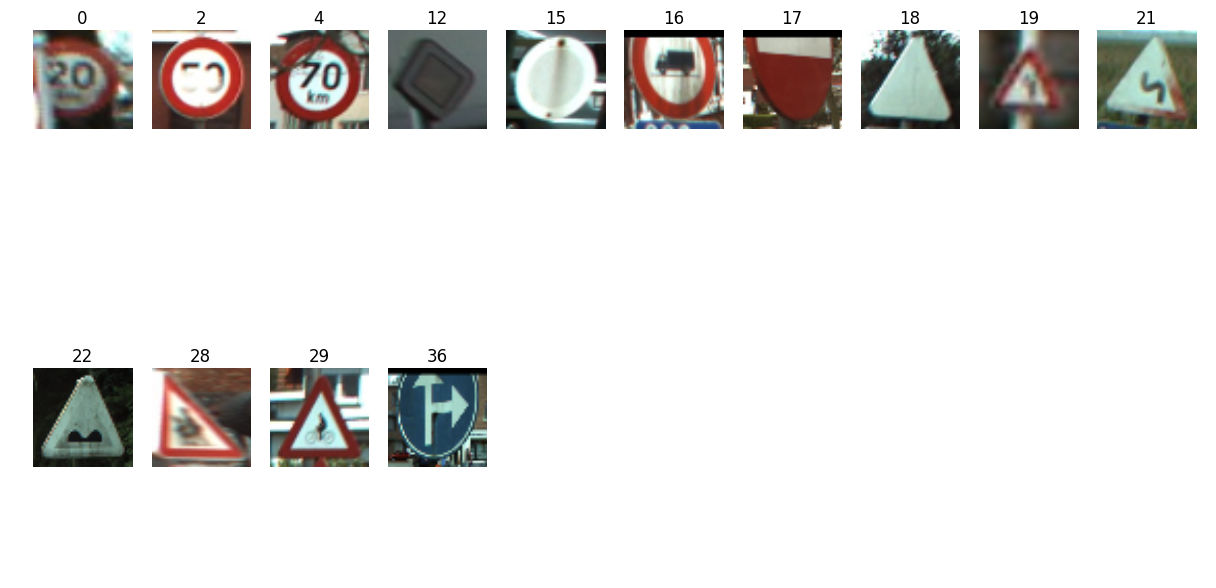

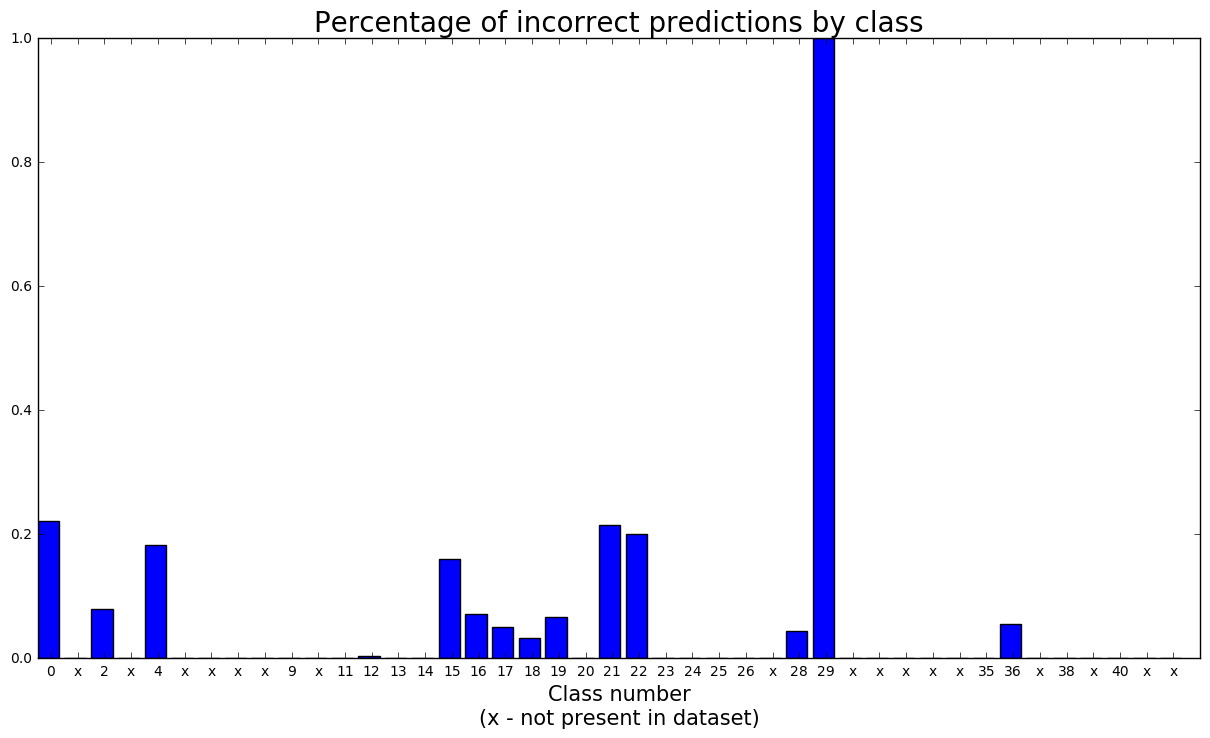

In [18]:
# Here we evaluate average model with new data

b_softmax, b_predictions = evaluate_average_model(X_belgium, y_belgium)

#plot the same examples as for last model
plot_incorrect_examples(belgium["features"], y_belgium, b_predictions)

classes = np.arange(n_classes)

plot_incorrect_predictions(b_predictions, classes)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I plotted samples of all classes that were incorrectly classified. I will describe some of them.

For signs 16, 17 and 36 the problem is that they are cut.

Signs 0 and 4 have occlusions, there is a branch or something in front of them.

Signs 15, 18, 21, 22 are too white, they lost their visual bounds.

Interesting observation about sign 29. As it can be seen, it is always classified incorrectly. I think the problem is the following. The german sign is a red bordered triangle with a bycicle in the center, but the belgium sign is a red triangle with a bycicle and a <b>person</b> on the bycicle. So they signs are quite different. This sign is frequiently mistaken by models with sign 27 which is a red bordered triangle with a person in the center of it.




### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The results accuracy for single net model:
    
    German dataset: 0.978, Belgium dataset: 0.907
    
The result accuracy for average of nets model:

    German dataset: 0.988, Belgium dataset: 0.936
    
So we can see that performance is worse on a new dataset. Probably something can be due to overfitting.
But some part of this problem may be in bad data preparation. As I said about sign 29 problem, sometimes signs are quite different even if they mean the same thing. I think that detailed analysis on each sign class misclassification is required which may remove "sign 29" like problems and the rest lost of performance will be on overfitting.


In [19]:

def plot_t_k(classes, t_k_values, t_k_indices, correct_indices, show_top_ratio, title, xlabel, 
             show_absent_as_x):
    """
    Plots bar chart of percentage of correct/incorrect predictions. Plots 1st top prediction with blue,
    2nd top with red, 3d top with green. Can show a number of percentage of correct answer being inside
    t_k_indices (e.g. top5) with a white number inside the largest bar.
    
    :param classes: list of classes e.g. [0, 1, 2..., 42]
    :param t_k_values: softmax probabilities sorted so t_k_values[:, 0] contains the highest
           (num_samples, n_classes)
    :param t_k_indices: predictions sorted according t_k_values probabilities
           (num_samples, n_classes)
    :param correct_indices: correct predictions (num_samples)
    :param show_top_ratio: if True a ration of correct answer being in topN will be shown inside bars
    :param title: plot title
    :param xlabel: plot x label
    :param show_absent_as_x: in case True, then class that is not present in t_k_indices[:, 0] will
                             be shown as X. This is needed for incorrect plot, when we want to
                             indicate that class was never predicted.
    """
    num_classes = len(classes)
    
    x_bar = classes # number corresponding to each bar
    x_bar_str = ["x" for i in classes] # string labels under each bar
    y_bar = np.zeros([num_classes, 3]) # values of each bar
    t_k_ratio = np.zeros_like(classes, dtype=np.float) # percentage of correct answer being 
                                                       # in given predictions
    
    # iterate over all classes
    for cl in classes:
        v = t_k_values[t_k_indices[:, 0]==cl] # get values predicted as this class
        i = t_k_indices[t_k_indices[:, 0]==cl] # get indices predicted as this class
        c = correct_indices[t_k_indices[:, 0]==cl].reshape([len(v), 1]) # get correct labels for
                                                                        # given predictions
        
        if len(v) > 0: # in case anything was predicted for this class
            # calc if any string of predictions contains correct prediction and calc ratio of such strings
            # to number of all strings
            t_k_r = np.mean(np.any(i == c, axis=1))
            t_k_ratio[cl] = t_k_r
            
            # average all predictions, as sum of every string was 1, this op gives a row which adds up to 1
            v = np.mean(v, axis=0)
            
            # take first 3 predictions
            y_bar[cl, :] = v[:3]
            # set class number so it is not presented as X
            x_bar_str[cl] = x_bar[cl]
        elif not show_absent_as_x: # in case nothing was predicted for class cl, but flat is set
            x_bar_str[cl] = x_bar[cl] # we still want to show class's number instead of X

    ax = create_plot(num_classes, 1, title, xlabel)
    ax.xaxis.set_ticklabels(x_bar_str)
    
    # plot
    rects = ax.bar(x_bar, y_bar[:, 0], color="blue", label="1st")
    ax.bar(x_bar, y_bar[:, 1], color="red", label="2nd")
    ax.bar(x_bar, y_bar[:, 2], color="green", label="3d")
    ax.legend(loc="upper right", shadow=True)
    
    # in case we need to show how many answers are in top n (e.g. top5)
    if show_top_ratio:
        for i in range(len(rects)):
            rect = rects[i]
            height = rect.get_height()
            if y_bar[i, 0] > 0:
                ratio = "1." if t_k_ratio[i] == 1 else ".%d" % int(t_k_ratio[i] * 10)
                ax.text(rect.get_x() + rect.get_width()/2., 
                        height-0.03, ratio, 
                        ha='center', va='bottom', color="white")
                



**Single net model predictions cerainty visualization**

model10/epoch44 model performance details:
Restoring session state with model model10/epoch44 ...


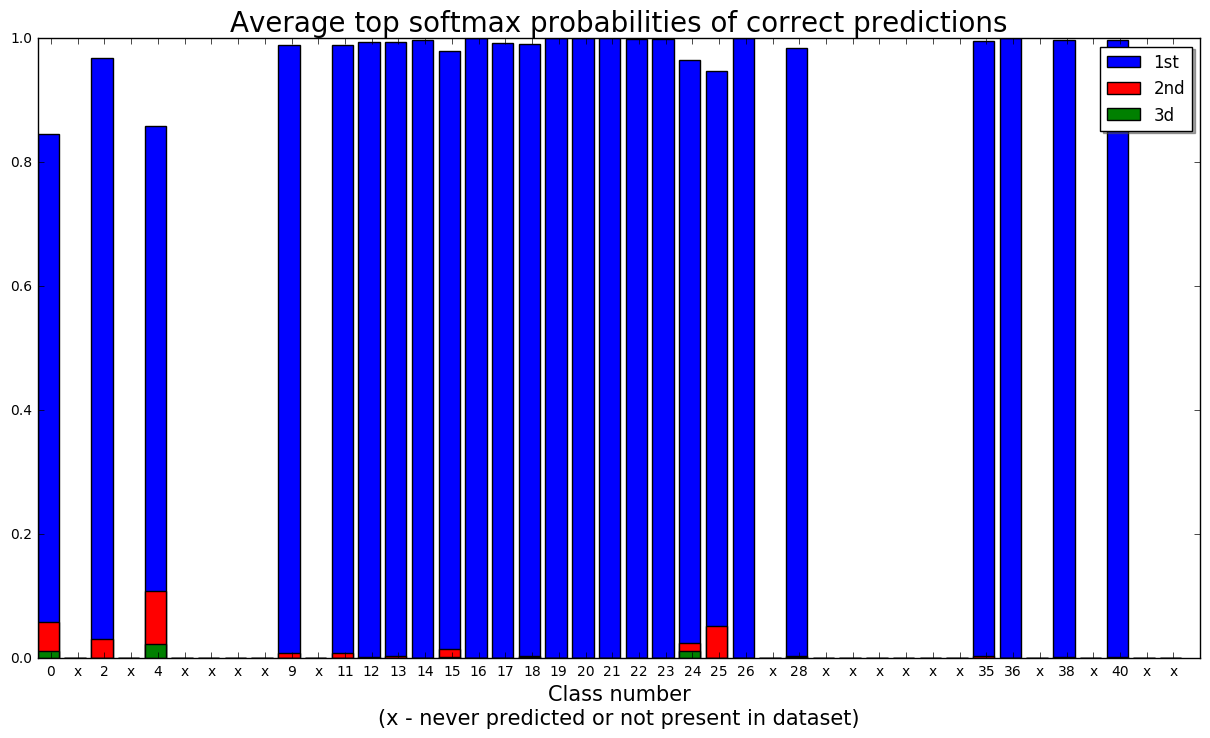

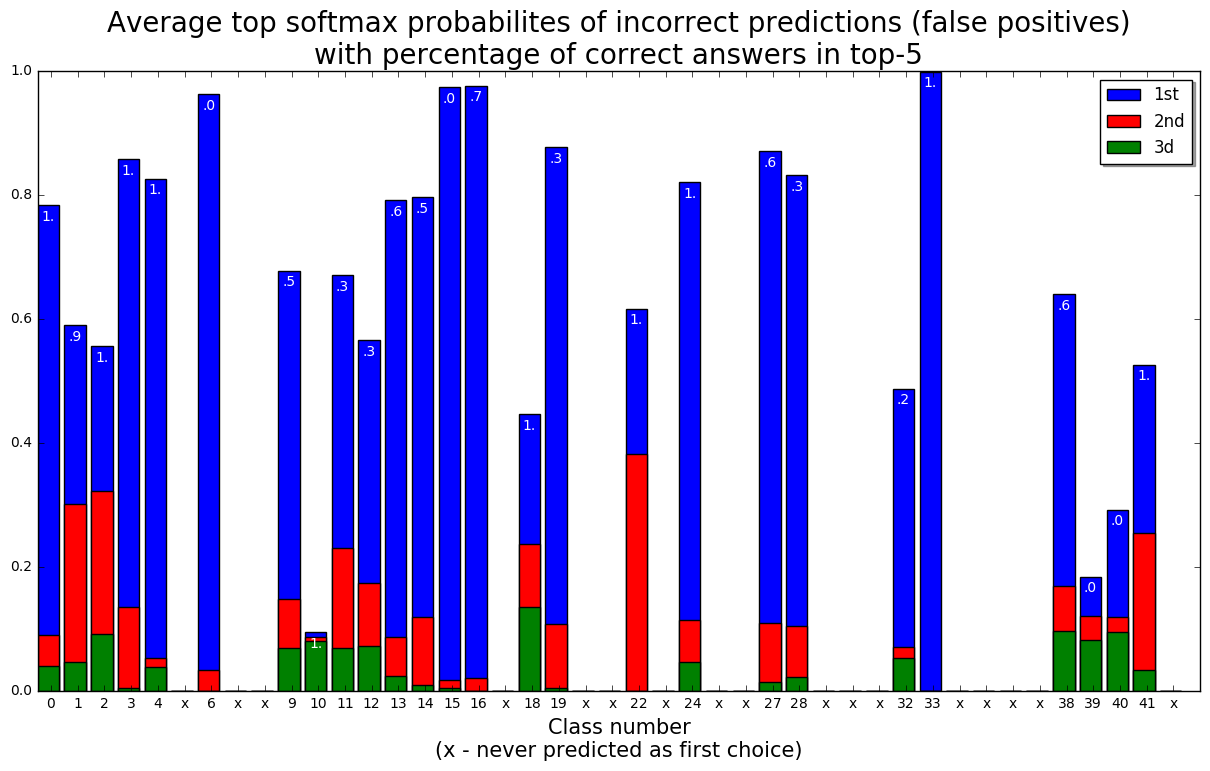

In [22]:
# here we elaborate on results of the last model
# we plot incorrect examples, incorrect predictions by class, correct predictions confidence by class,
# incorrect prediction confidence by class
last_model = "model10/epoch44"

print("{} model performance details:".format(last_model))

reset_evaluation_variables(True, False)

with tf.Session() as session:
    print("Restoring session state with model {} ...".format(last_model))
    tf.train.Saver().restore(session, last_model)
    
    preds = np.zeros(len(X_belgium))
    t_k_values = np.zeros([len(X_belgium), 5], dtype=np.float32)
    t_k_indices = np.zeros([len(X_belgium), 5], dtype=np.int32)
    for offset in range(0, len(X_belgium), BATCH_SIZE):
        x_batch = X_belgium[offset:offset+BATCH_SIZE]
        y_batch = y_belgium[offset:offset+BATCH_SIZE]
        p, t = session.run([predictions, top_k], feed_dict={x: x_batch, y: y_batch, keep_prob:1})
        preds[offset:offset+BATCH_SIZE] = p
        t_k_values[offset:offset+BATCH_SIZE, :] = t.values
        t_k_indices[offset:offset+BATCH_SIZE, :] = t.indices
            
    classes = np.arange(n_classes)
                
    plot_t_k(classes, t_k_values[preds == y_belgium], t_k_indices[preds == y_belgium], 
             y_belgium[preds == y_belgium], False,
            "Average top softmax probabilities of correct predictions", 
             "Class number\n(x - never predicted or not present in dataset)", True)            
    plot_t_k(classes, t_k_values[preds != y_belgium], t_k_indices[preds != y_belgium], 
             y_belgium[preds != y_belgium], True,
            "Average top softmax probabilites of incorrect predictions (false positives)\nwith percentage of correct answers in top-5",
            "Class number\n(x - never predicted as first choice)", True)         
        
    
### Feel free to use as many code cells as needed.

**Average of nets model predictions cerainty visualization**

Average model performance details:


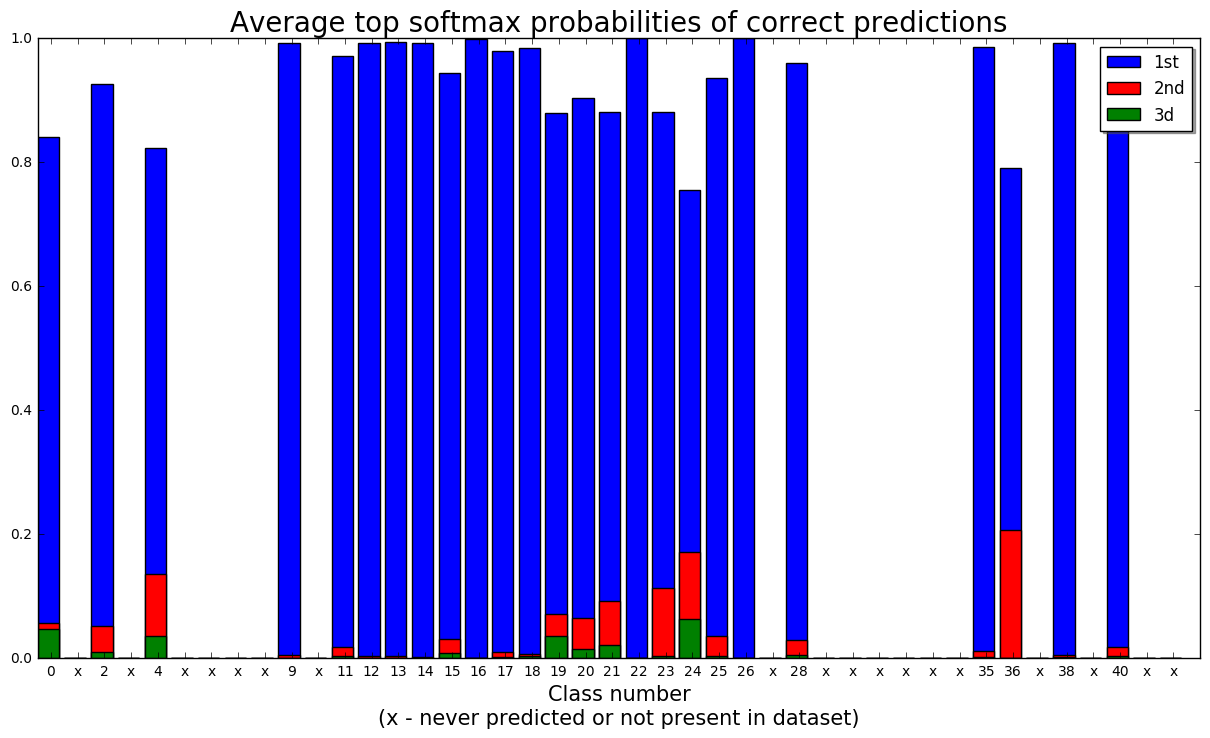

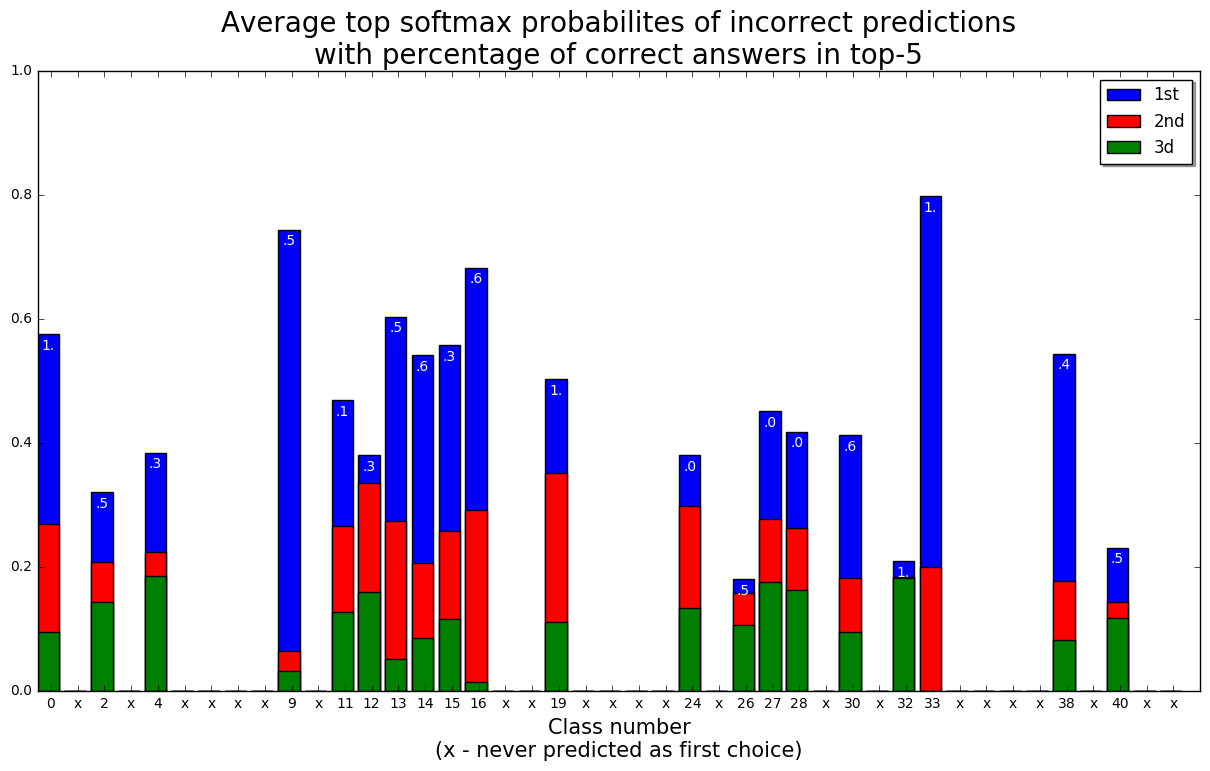

In [24]:
print("Average model performance details:")

# here we elaborate on average model performance

# get top predictions so top_predictions[:, 0] contains the most likely predictions
top_predictions = np.argsort(-b_softmax, axis=1)[:, :5]
# get sorted softmax so the sorted_softmax[:, 0] contains the highest probabilities
sorted_softmax = np.sort(-b_softmax, axis=1) * -1
# minuses are used because I don't know how to do the same sort in descending order

#plot the same examples as for last model
classes = np.arange(n_classes)

plot_t_k(classes, sorted_softmax[b_predictions == y_belgium], top_predictions[b_predictions == y_belgium], 
         y_belgium[b_predictions == y_belgium], False,
        "Average top softmax probabilities of correct predictions", 
         "Class number\n(x - never predicted or not present in dataset)", True)            
plot_t_k(classes, sorted_softmax[b_predictions != y_belgium], top_predictions[b_predictions != y_belgium], 
         y_belgium[b_predictions != y_belgium], True,
        "Average top softmax probabilites of incorrect predictions\nwith percentage of correct answers in top-5",
        "Class number\n(x - never predicted as first choice)", True)         
        
    
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

**Single net model:**

<ol>

<li>It is quite certain in all correct results. The least certain signs are 0 and 4 which correspond to 20 and 70 speed limit. This may be due to belgium signs are a bit different, they contain "km" letters under speed digits sometimes.</li>
<li>It is less certain when it is wrong, but still quite certain. Sometimes it is even almost 100% sure. About half of incorrectly predicted classes have about 0.8 softmax probability.</li>
<li>For 10 of overall 26 incorrectly predicted classes correct answer is always in top 5, for 17 incorrectly predicted classes half of the time or more often the correct answer can be found in top 5.</li>

</ol>

**Average of nets model**

<ol>
<li>It is less sure in its correct answers then single net model. In addition to 20 and 70 speed limit sign, it is not sure in 24 and 36 signs</li>
<li>But it is much less certain when it is wrong, compared to single net model. It incorrectly predicts 20 classes and only about two of them the model's certainty is close to 80%.</li>
<li>For 5 of overall 20 incorrectly predicted classes correct answer is always in top 5, for 13 incorrectly predicted classes half of the time or more often the correct answer can be found in top 5.</li>
</ol>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.